---
title: "finite differences"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---


<!-- ![](central_diff.png) -->

Definition of a **derivative**:

$$
\underbrace{\dot{f} = f'(t) = \frac{d}{dt}f(t) = \frac{df(t)}{dt}}_{\text{same thing}} = \lim_{\Delta t \rightarrow 0} \frac{f(t+\Delta t) - f(t)}{\Delta t}
$$

Numerically, we can approximate the derivative $f'(t)$ of a time series $f(t)$ as

$$
\frac{d}{dt}f(t) = \frac{f(t+\Delta t) - f(t)}{\Delta t} + \mathcal{O}(\Delta t).
$$ {#eq-tpfdf}

::: {.column-margin}
The expression $\mathcal{O}(\Delta t)$ means that the error associated with the approximation is proportional to $\Delta t$. This is called ["Big O notation"](https://en.wikipedia.org/wiki/Big_O_notation).
:::

The expression above is called the *two-point forward difference formula*.

In [2]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
# %matplotlib widget

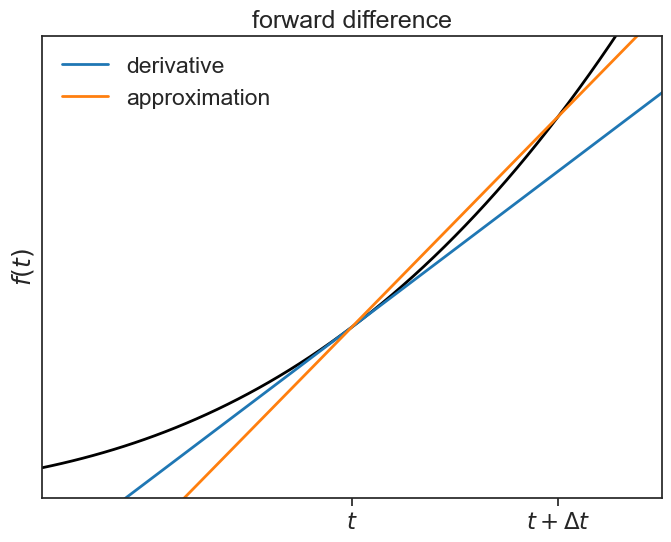

In [3]:
#| code-summary: "forward difference plot"
t = np.linspace(0,10,101)
def f(t):
    """
    function to plot
    """
    return t**3+t**2

def ftag(t):
    """
    derivative
    """
    return 3*t**2 +2*t

def line_chord(p1, p2, t):
    """
    given two points p1 and p2, return equation for the line that connects between them
    """
    p1x, p1y = p1
    p2x, p2y = p2
    slope = (p1y-p2y) / (p1x-p2x)
    intercept = (p1x*p2y - p1y*p2x) / (p1x-p2x)
    return slope*t + intercept

def line_tangent(p1, slope, t):
    """
    return equation of the line that passes through p1 with slope "slope"
    """
    p1x, p1y = p1
    intercept = p1y - slope*p1x
    return slope*t + intercept

x1 = 6.0
y1 = f(x1)
x2 = 8.0
y2 = f(x2)
chord = line_chord((x1,y1), (x2,y2), t)
tangent = line_tangent((x1,y1), ftag(x1), t)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(t, f(t), lw=2, color="black")
ax.plot(t, tangent, color="tab:blue", lw=2, label="derivative")
ax.plot(t, chord, color="tab:orange", lw=2, label="approximation")
ax.legend(frameon=False)

ax.set(xlim=[3, 9],
       ylim=[-10,700],
       ylabel=r"$f(t)$",
       xticks=[6,8],
       yticks=[],
       xticklabels=[r'$t$', r'$t+\Delta t$'],
       title="forward difference");

This widget helps you visualize the two-point forward difference formula, especiall how the limit approaches the derivative, even though both the numerator and the denominator approach zero as $\Delta t$ approaches zero.
<iframe src="https://www.geogebra.org/classic/zzmCbbXw?embed" width="700" height="500" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>

Likewise, we can define the *two-point backward difference formula*:

$$
\frac{df(t)}{dt} = \frac{f(t) - f(t-\Delta t)}{\Delta t} + \mathcal{O}(\Delta t).
$$ {#eq-tpbdf}



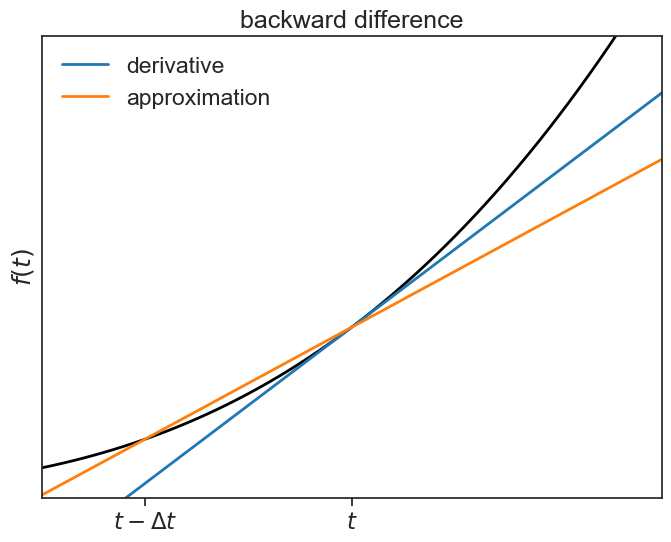

In [4]:
#| code-summary: "backward difference plot"
x0 = 4.0
y0 = f(x0)
chord2 = line_chord((x1,y1), (x0,y0), t)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(t, f(t), lw=2, color="black")
ax.plot(t, tangent, color="tab:blue", lw=2, label="derivative")
ax.plot(t, chord2, color="tab:orange", lw=2, label="approximation")
ax.legend(frameon=False)

ax.set(xlim=[3, 9],
       ylim=[-10,700],
       ylabel=r"$f(t)$",
       xticks=[4,6],
       yticks=[],
       xticklabels=[r'$t-\Delta t$', r'$t$'],
       title="backward difference");


If we sum together @eq-tpfdf and @eq-tpbdf we get:

<!-- $$
\cancel{abcde}
$$ -->

$$
\begin{aligned}
2\frac{df(t)}{dt} &= \frac{f(t+\Delta t) - \cancel{f(t)}}{\Delta t} + \frac{\cancel{f(t)} - f(t-\Delta t)}{\Delta t} \\
 &= \frac{f(t+\Delta t) - f(t-\Delta t)}{\Delta t}.
\end{aligned}
$$ {#eq-sum}

Dividing both sides by 2 gives the *two-point central difference formula*:

$$
\frac{df(t)}{dt} = \frac{f(t+\Delta t) - f(t-\Delta t)}{2\Delta t} + \mathcal{O}(\Delta t^2). 
$$ {#eq-twcdf}



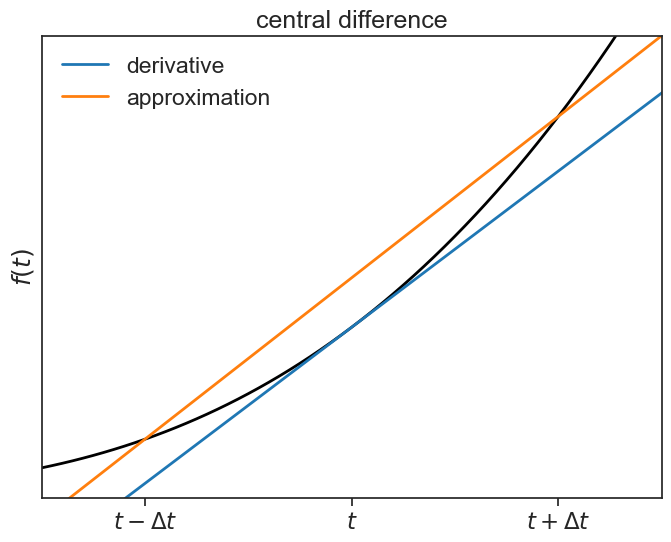

In [5]:
#| code-summary: "backward difference plot"
chord3 = line_chord((x2,y2), (x0,y0), t)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(t, f(t), lw=2, color="black")
ax.plot(t, tangent, color="tab:blue", lw=2, label="derivative")
ax.plot(t, chord3, color="tab:orange", lw=2, label="approximation")
ax.legend(frameon=False)

ax.set(xlim=[3, 9],
       ylim=[-10,700],
       ylabel=r"$f(t)$",
       xticks=[4,6,8],
       yticks=[],
       xticklabels=[r'$t-\Delta t$', r'$t$', r'$t+\Delta t$'],
       title="central difference");

Let's compare these three methods. For which of them the slope of the orange line is closer to the actual derivative (blue)?

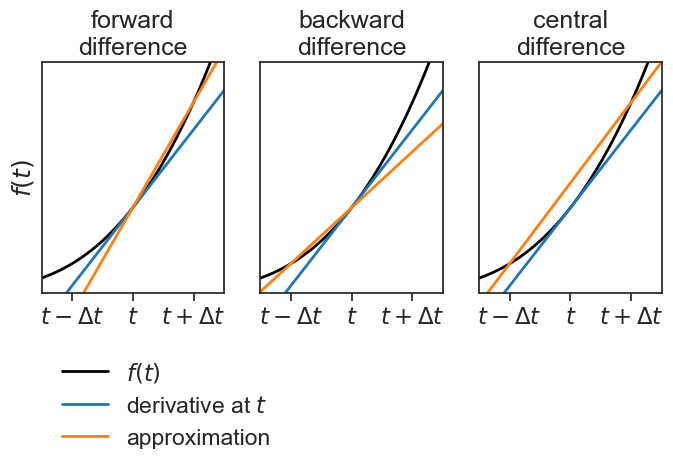

In [26]:
#| code-summary: "compare the 3 methods"
fig, ax = plt.subplots(1, 3, figsize=(8,3), sharex=True, sharey=True)

ax[0].plot(t, f(t), lw=2, color="black", label=r"$f(t)$")
ax[0].plot(t, tangent, color="tab:blue", lw=2, label=r"derivative at $t$")
ax[0].plot(t, chord, color="tab:orange", lw=2, label="approximation")
ax[0].legend(loc="upper left", bbox_to_anchor=(0.0,-0.2), frameon=False)

ax[1].plot(t, f(t), lw=2, color="black")
ax[1].plot(t, tangent, color="tab:blue", lw=2, label="derivative")
ax[1].plot(t, chord2, color="tab:orange", lw=2, label="approximation")

ax[2].plot(t, f(t), lw=2, color="black")
ax[2].plot(t, tangent, color="tab:blue", lw=2, label="derivative")
ax[2].plot(t, chord3, color="tab:orange", lw=2, label="approximation")

ax[0].set(title="forward\ndifference",
          ylabel=r"$f(t)$",);
ax[1].set(title="backward\ndifference");

ax[2].set(xlim=[3, 9],
       ylim=[-10,700],
       xticks=[4,6,8],
       yticks=[],
       xticklabels=[r'$t-\Delta t$', r'$t$', r'$t+\Delta t$'],
       title="central\ndifference");


Two things are worth mentioning about the approximation above:

1. it is balanced, that is, there is no preference of the future over the past.
1. its error is proportional to $\Delta t^2$, it is a lot more precise than the unbalanced approximations :)

::: {.column-margin}
To understand why the error is proportional to $\Delta t^2$, one can subtract the Taylor expansion of $f(t-\Delta t)$ from the Taylor expansion of $f(t+\Delta t)$.
[See this, pages 3 and 4.](https://home.cc.umanitoba.ca/~farhadi/Math2120/Numerical%20Differentiation.pdf)
:::

<!-- ![](central_diff.png) -->

The function [`np.gradient`](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) calculates the derivative using the central difference for points in the interior of the array, and uses the forward (backward) difference for the derivative at the beginning (end) of the array.

::: {.column-margin}
The "gradient" usually refers to a first derivative with respect to space, and it is denoted as $\nabla f(x)=\frac{df(x)}{dx}$. However, it doesn't really matter if we call the independent variable $x$ or $t$, the derivative operator is exactly the same.
:::

Check out this [nice example](https://gist.github.com/astrojuanlu/e4d47fec5d94d2224762a61680419eb2).

## dead sea level

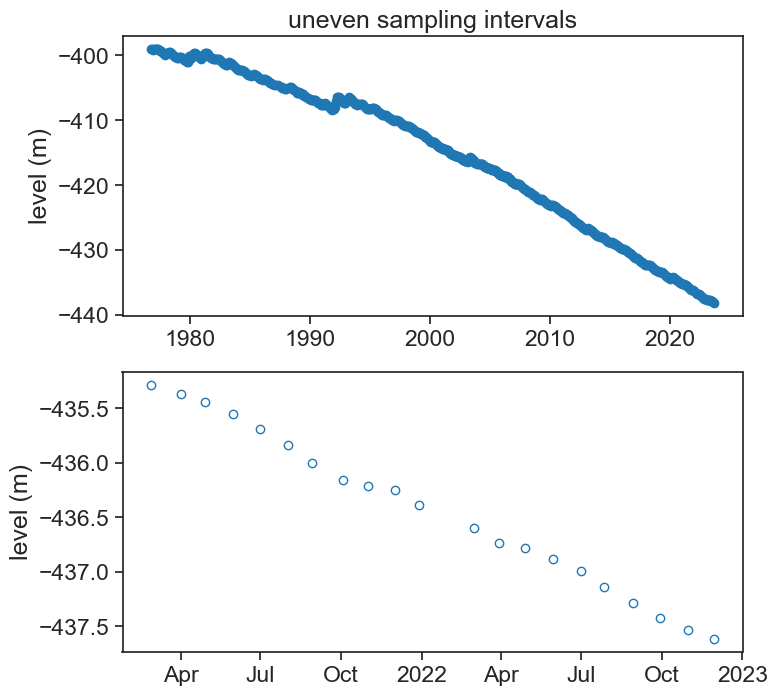

In [5]:
#| code-summary: "load data and plot"
filename = "../archive/data/dead_sea_level.csv"
df = pd.read_csv(filename)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df = df.set_index('date').sort_values(by='date')

fig, ax = plt.subplots(2, 1, figsize=(8,8))
fig.subplots_adjust(hspace=0.2)
ax[0].plot(df['level'], '-o', color="tab:blue",)
ax[0].set(title="uneven sampling intervals",
          ylabel="level (m)")
locator = mdates.AutoDateLocator(minticks=5, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax[0].xaxis.set_major_locator(locator)
ax[0].xaxis.set_major_formatter(formatter)

locator = mdates.AutoDateLocator(minticks=5, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax[1].plot(df.loc['2021-02-01':'2022-12-01', 'level'], 'o', color="tab:blue", mfc="None")
ax[1].xaxis.set_major_locator(locator)
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set(ylabel="level (m)");

[Text(0, 0.5, 'level rate of change\n(m day$^{-1}$)')]

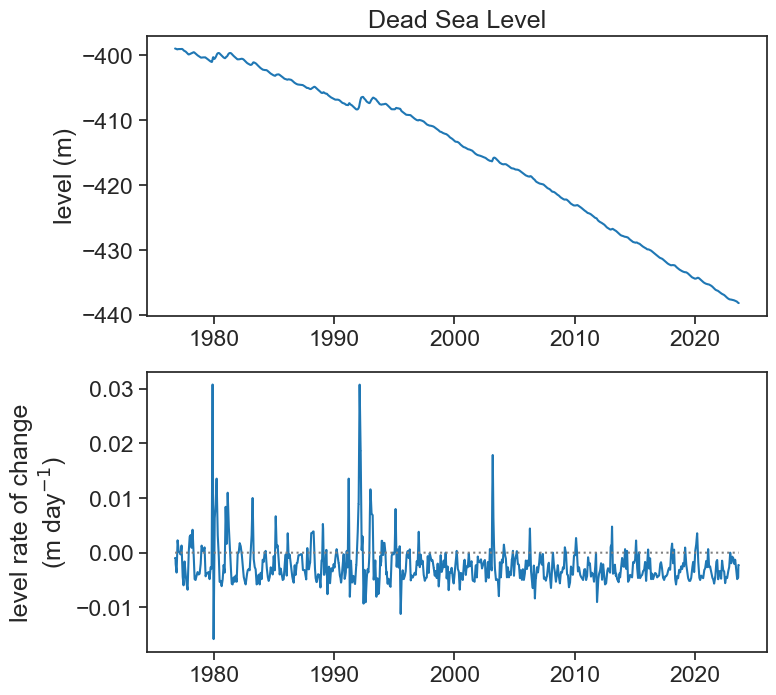

In [6]:
df2 = df['level'].resample('D').interpolate('time').to_frame()
df2['level_smooth'] = df2['level'].rolling('30D', center=True).mean()
dt = 1.0 # day
df2['grad'] = np.gradient(df2['level_smooth'].values, dt)

fig, ax = plt.subplots(2, 1, figsize=(8,8))
fig.subplots_adjust(hspace=0.2)
ax[0].plot(df2['level_smooth'], color="tab:blue",)
ax[0].set(title="Dead Sea Level",
          ylabel="level (m)")
ax[1].plot(df2['grad'], color="tab:blue")
ax[1].plot(df2['grad']*0, color="gray", ls=":")
ax[1].set(ylabel="level rate of change\n"+r"(m day$^{-1}$)")

In [12]:
df2['level'].to_frame().to_csv()

If this is too noisy to your taste, and you are looking for rates of change for longer time scales (e.g., a year), then we can smooth the original signal. First let's smooth it by applying a running average of width 365 days.

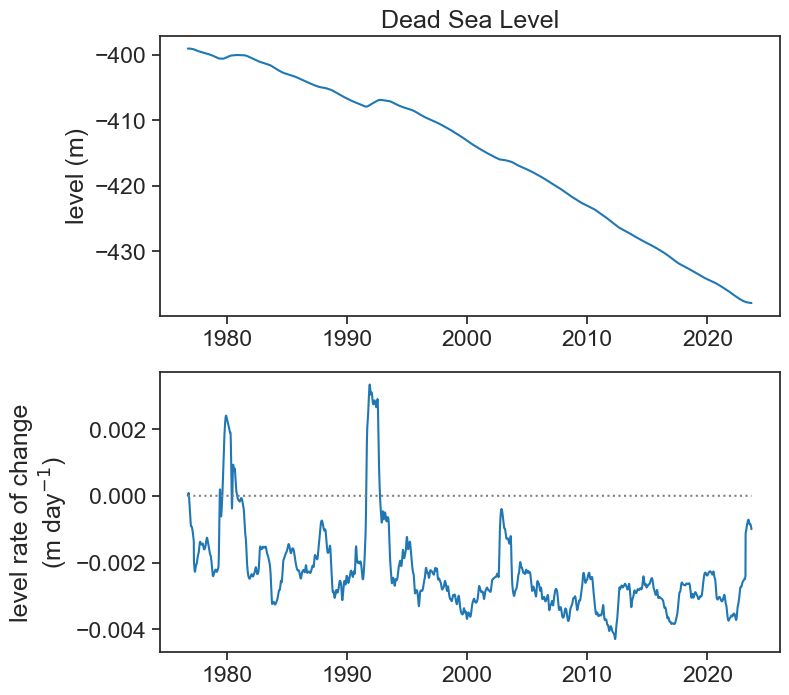

In [7]:
df2['level_smooth_yr'] = df2['level_smooth'].rolling('365D', center=True).mean()
dt = 1.0 # day
df2['grad_yr'] = np.gradient(df2['level_smooth_yr'].values, dt)

fig, ax = plt.subplots(2, 1, figsize=(8,8))
fig.subplots_adjust(hspace=0.2)
ax[0].plot(df2['level_smooth_yr'], color="tab:blue",)
ax[0].set(title="Dead Sea Level",
          ylabel="level (m)")
ax[1].plot(df2['grad_yr'], color="tab:blue")
ax[1].plot(df2['grad_yr']*0, color="gray", ls=":")
ax[1].set(ylabel="level rate of change\n"+r"(m day$^{-1}$)");

Let's see now with a 5-year window.

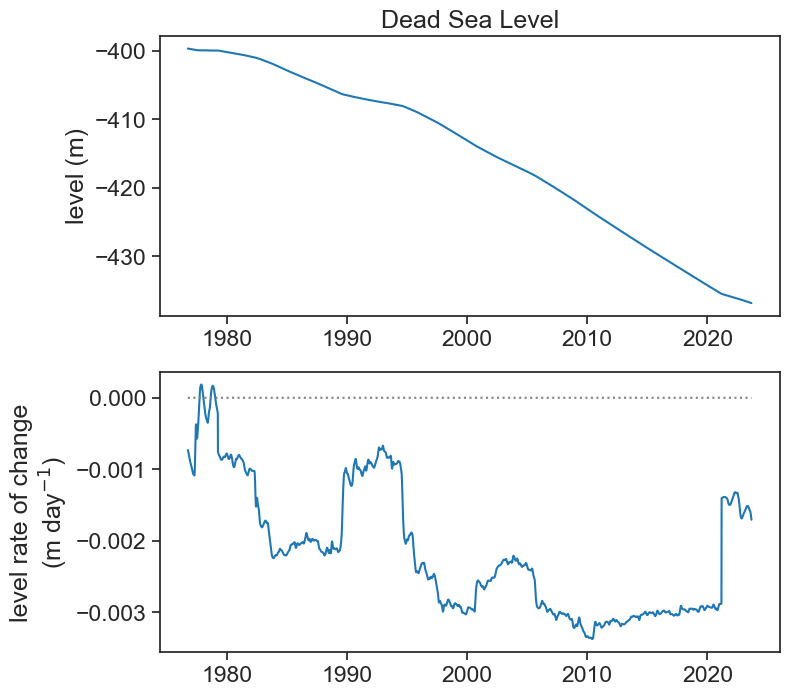

In [8]:
df2['level_smooth_5yr'] = df2['level_smooth'].rolling('1825D', center=True).mean()
dt = 1.0 # day
df2['grad_5yr'] = np.gradient(df2['level_smooth_5yr'].values, dt)

fig, ax = plt.subplots(2, 1, figsize=(8,8))
fig.subplots_adjust(hspace=0.2)
ax[0].plot(df2['level_smooth_5yr'], color="tab:blue",)
ax[0].set(title="Dead Sea Level",
          ylabel="level (m)")
ax[1].plot(df2['grad_5yr'], color="tab:blue")
ax[1].plot(df2['grad_5yr']*0, color="gray", ls=":")
ax[1].set(ylabel="level rate of change\n"+r"(m day$^{-1}$)");